# ENSF 611 - Final Project - House Prices Advanced Regression Techniques Kaggle Competition

## Completed by: Michael Kissinger

## Step 1 - Importing Data
First we will import all the typically required packages. I am also setting pandas to display show all rows so we can more effectively analyze the data.

In [25]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)

Now we will import the training and test datasets and show the shape head of the data sets.

In [26]:
train_data = pd.read_csv("train.csv")
print(train_data.shape)
train_data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [27]:
test_data = pd.read_csv("test.csv")
print(test_data.shape)
test_data.head()

(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Step 2 - Inspecting Data, Data Summary, and Visualizations
Now I will view view info about the features of the dataset. We can see that we have many "object" types. We will need to do some pre-processing with the object types, by either dropping or encoding these features.

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [28]:
#Maybe not needed
train_data.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

My first approach will be too only inspect the numeric features, while dropping the features that are objects.

In [29]:
#Numeric Features
numeric_features = train_data.select_dtypes(include=[np.number])
print(numeric_features.dtypes)
print("The shape of the numeric features are: ", numeric_features.shape)

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object
The shape of the numeric features ar

We can inspect the target vector (Sale price) and see that there is an uneven distribtion in the sale prices. To create a more effective model, can try taking the log of the sale price to get an even distribution.

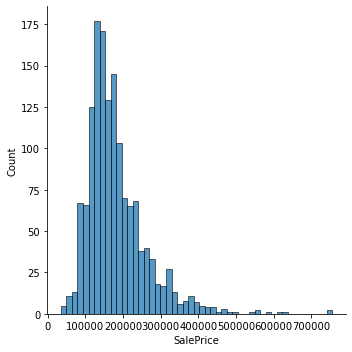

In [30]:
y_not_log = train_data.SalePrice
plt1 = sns.displot(data=y_not_log)

Here we see the log of the sale price has a nice even distribution. We will need to make sure we change this back from a log after we build our model.

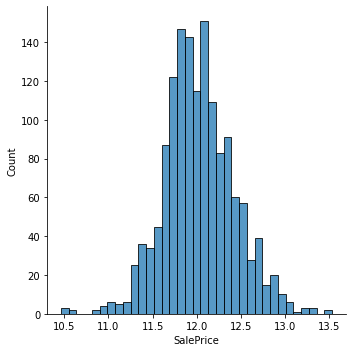

In [31]:
y_log = np.log(train_data.SalePrice)
plt1 = sns.displot(data=y_log)

I will now inspect the correlation between the numeric features and the sale price. We will inspect the top 5 and lowest 5 numeric features.

In [32]:
corr = numeric_features.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


We can plot these top four features to get an visual idea of how these features are distributed and relate to the sale price.

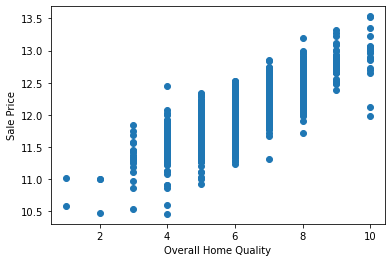

In [41]:
target = np.log(train_data.SalePrice)
plt.scatter(x=train_data['OverallQual'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Overall Home Quality')
plt.show()

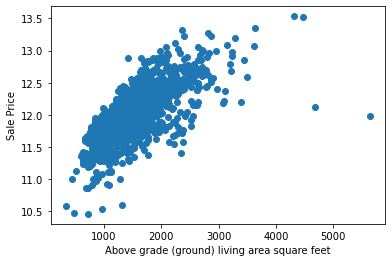

In [40]:
plt.scatter(x=train_data['GrLivArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

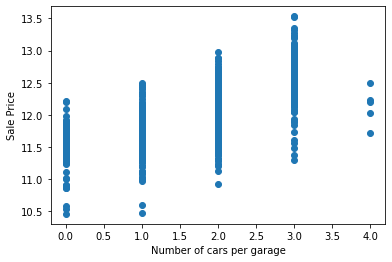

In [39]:
plt.scatter(x=train_data['GarageCars'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Number of cars per garage')
plt.show()

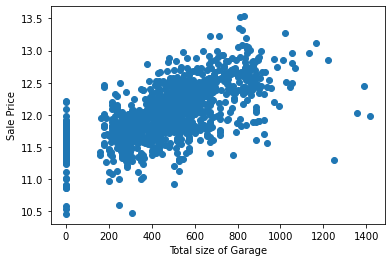

In [38]:
plt.scatter(x=train_data['GarageArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Total size of Garage')
plt.show()

We can see there is a relatively linear correlation between these features and the sale price. We can view this as an indicator that these features should be relatively sucessful in building a mdoel to determine the home prices accurately.

## Step 3 - Pre-processing

We will now create a preprocessed dataset, which includes only the numerical features and also interpolate to fill in all missing values.  

After that we will create our feature matrix and target matrix. The feature matrix will drop the sale price and ID, since the sale price if the target vector, and the ID just signifies which entries are which, and are not related to house prices. The target Matrix is the saleprice feature, but we will use a log of this feature as discussed above.

In [4]:
preprocessed_data = train_data.select_dtypes(include=[np.number]).interpolate().dropna()

y = np.log(train_data.SalePrice)
X = preprocessed_data.drop(['SalePrice', 'Id'], axis=1)


## Step 4 - Testing on Machine Learning Models
We will now split the data into a training and test set.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=37, test_size = 0.2)

We can now try out several different type of regressors to see hich gives the best result.

In [6]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression().fit(X_train, y_train)

print("Linear Regression Model:")
print("Accuracy on training set: {:.3f}".format(model_lr.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model_lr.score(X_test, y_test)))

Linear Regression Model:
Accuracy on training set: 0.879
Accuracy on test set: 0.814


In [7]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(random_state=79).fit(X_train, y_train)

print("Random Forest Regressor Model:")
print("Accuracy on training set: {:.3f}".format(model_RFR.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model_RFR.score(X_test, y_test)))

Random Forest Regressor Model:
Accuracy on training set: 0.982
Accuracy on test set: 0.810


In [8]:
from sklearn.ensemble import GradientBoostingRegressor

model_GBR = GradientBoostingRegressor(random_state=79).fit(X_train, y_train)

print("Gradient Boosting Regressor Model:")
print("Accuracy on training set: {:.3f}".format(model_GBR.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model_GBR.score(X_test, y_test)))

Gradient Boosting Regressor Model:
Accuracy on training set: 0.955
Accuracy on test set: 0.859


In [9]:
from sklearn.svm import SVR

model_SVR = SVR().fit(X_train, y_train)

print("SVR Model:")
print("Accuracy on training set: {:.3f}".format(model_SVR.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model_SVR.score(X_test, y_test)))

SVR Model:
Accuracy on training set: 0.758
Accuracy on test set: 0.723


We can see that the gradient boosted regressor has the highest score, however the accuracy of the training set and the accuracy of the train set have a high deviance.

We can now cross validate the negative RMS scores.

In [10]:
from sklearn.model_selection import cross_validate


def get_regressor_neg_rms(model, X, y, cv=7):
    '''Calculate train and validation score for regressor (model) using cross-validation
        
        score is negative root mean-squared error (rms).
        
        model (sklearn classifier): Regressor to train and evaluate
        X (numpy.array or pandas.DataFrame): Feature matrix
        y (numpy.array or pandas.Series): Target vector
        
        returns: mean training negative rms, mean validation negative rms
    
    '''    
    scores = cross_validate(model, X, y, cv=7, scoring=('neg_root_mean_squared_error'), return_train_score=True)
    
    return scores['train_score'].mean(), scores['test_score'].mean()

In [11]:
models = [LinearRegression(), RandomForestRegressor(random_state=64), GradientBoostingRegressor(random_state=79)]
title = ["Linear Regression:", "Random Forest Regressor:", "Gradient Boosting Regressor:"]

for i in range(len(models)):
    accuracy = (get_regressor_neg_rms(models[i], X_train, y_train, cv=7))
    print(title[i])
    print("Training Negative Root-Mean Squared Error: {:.3f}".format(accuracy[0]))
    print("Test Negative Root-Mean Squared Error: {:.3f}".format(accuracy[1]))
    print()

Linear Regression:
Training Negative Root-Mean Squared Error: -0.139
Test Negative Root-Mean Squared Error: -0.152

Random Forest Regressor:
Training Negative Root-Mean Squared Error: -0.056
Test Negative Root-Mean Squared Error: -0.146

Gradient Boosting Regressor:
Training Negative Root-Mean Squared Error: -0.082
Test Negative Root-Mean Squared Error: -0.135



We can see that the Gradient Boosting Regressor has the RMSE that is the closest to zero, so this is likely a good model. We can now try fine tuning the various parameters.

In [12]:
#TODO: Calling get_regressor_neg_rms() for each parameter pair

max_depth = [1, 3, 5, 7]
n_estimators = [100, 200, 500]
learning_rate =  [0.01, 0.1, 1.0]

for i in max_depth:
    for j in n_estimators:
        for k in learning_rate:
            print("Max depth: ", i)
            print("N estimators: ", j)
            print("Learning rate: ", k)
            model = GradientBoostingRegressor(learning_rate = k, max_depth = i, n_estimators = j, random_state=64)
            accuracy = (get_regressor_neg_rms(model, X_train, y_train, cv=7))
            print("Training Negative Root-Mean Squared Error: {:.3f}".format(accuracy[0]))
            print("Test Negative Root-Mean Squared Error: {:.3f}".format(accuracy[1]))

Max depth:  1
N estimators:  100
Learning rate:  0.01
Training Negative Root-Mean Squared Error: -0.293
Test Negative Root-Mean Squared Error: -0.294
Max depth:  1
N estimators:  100
Learning rate:  0.1
Training Negative Root-Mean Squared Error: -0.138
Test Negative Root-Mean Squared Error: -0.152
Max depth:  1
N estimators:  100
Learning rate:  1.0
Training Negative Root-Mean Squared Error: -0.108
Test Negative Root-Mean Squared Error: -0.148
Max depth:  1
N estimators:  200
Learning rate:  0.01
Training Negative Root-Mean Squared Error: -0.241
Test Negative Root-Mean Squared Error: -0.244
Max depth:  1
N estimators:  200
Learning rate:  0.1
Training Negative Root-Mean Squared Error: -0.118
Test Negative Root-Mean Squared Error: -0.141
Max depth:  1
N estimators:  200
Learning rate:  1.0
Training Negative Root-Mean Squared Error: -0.095
Test Negative Root-Mean Squared Error: -0.145
Max depth:  1
N estimators:  500
Learning rate:  0.01
Training Negative Root-Mean Squared Error: -0.174


From the results above we see that none of the test scores above are closer to zero than the defult parameters. This is quite disapointing, however we will now select the best parameters from above and try futher refinement.

In [13]:
max_depth = [2, 3, 4]
n_estimators = [300, 400, 500]
learning_rate =  [0.05, 0.10, 0.15]

for i in max_depth:
    for j in n_estimators:
        for k in learning_rate:
            print("Max depth: ", i)
            print("N estimators: ", j)
            print("Learning rate: ", k)
            model = GradientBoostingRegressor(learning_rate = k, max_depth = i, n_estimators = j, random_state=64)
            accuracy = (get_regressor_neg_rms(model, X_train, y_train, cv=7))
            print("Training Negative Root-Mean Squared Error: {:.3f}".format(accuracy[0]))
            print("Test Negative Root-Mean Squared Error: {:.3f}".format(accuracy[1]))

Max depth:  2
N estimators:  300
Learning rate:  0.05
Training Negative Root-Mean Squared Error: -0.095
Test Negative Root-Mean Squared Error: -0.136
Max depth:  2
N estimators:  300
Learning rate:  0.1
Training Negative Root-Mean Squared Error: -0.081
Test Negative Root-Mean Squared Error: -0.135
Max depth:  2
N estimators:  300
Learning rate:  0.15
Training Negative Root-Mean Squared Error: -0.071
Test Negative Root-Mean Squared Error: -0.136
Max depth:  2
N estimators:  400
Learning rate:  0.05
Training Negative Root-Mean Squared Error: -0.090
Test Negative Root-Mean Squared Error: -0.135
Max depth:  2
N estimators:  400
Learning rate:  0.1
Training Negative Root-Mean Squared Error: -0.073
Test Negative Root-Mean Squared Error: -0.135
Max depth:  2
N estimators:  400
Learning rate:  0.15
Training Negative Root-Mean Squared Error: -0.062
Test Negative Root-Mean Squared Error: -0.136
Max depth:  2
N estimators:  500
Learning rate:  0.05
Training Negative Root-Mean Squared Error: -0.08

There is some marginal improvement over the default parameters here. We will go ahead with the max depth=3, N-estimators=400 and the learing rate of 0.05. This has the testing RMSE closest to zero, along with the training score that is most closely correlated to the testing score. 

Next we will get our Kaggle submission file ready for submission. TO prepare the file we must perform the same transformations on the test_data that we did to the training data. In this case that means dropping all non-numeric features, drop the ID column, and interpolate to fill in missing values.  

We will then apply our model with our refined parameters determined above. 

In [15]:
submission = pd.DataFrame()
submission['Id'] = test_data.Id
features = test_data.select_dtypes(
        include=[np.number]).drop(['Id'], axis=1).interpolate()

model_GBR = GradientBoostingRegressor(learning_rate = 0.05, max_depth = 3, n_estimators = 400, random_state=64)
model_GBR.fit(X_train, y_train)

predictions = model_GBR.predict(features)


Next since we can't have the final results as a logorithic interpretation of the homes value we must apply an exponent to our predictions to convert them back to the regular values. This is shown below.

In [19]:
final_predictions = np.exp(predictions)

In [16]:
print ("Original predictions are: \n", predictions[:5], "\n")
print ("Final predictions are: \n", final_predictions[:5])

Original predictions are: 
 [11.75792135 11.91821999 12.08571512 12.14237864 12.12814397] 

Final predictions are: 
 [127761.60616488 149974.41458855 177320.67857905 187658.41340534
 185006.08017031]


We will have a quick look at the head of our submissino to ensure it is in the correct format for submission. We can see below that everything looks good.

In [17]:
submission['SalePrice'] = final_predictions
submission.head()

,Id,SalePrice
0,1461,127761.606165
1,1462,149974.414589
2,1463,177320.678579
3,1464,187658.413405
4,1465,185006.080170


Lastly we export as a CVS and submit to Kaggle.

In [18]:
submission.to_csv('submission.csv', index=False)

# Results, Interpretation, and Final Reflections

## Data Summary

The data that was used was only the numerical features from the housing dataset. As shown by the visualizations in step 2 there are several features with large correlation to the houseing prices, so this seemed to be a good place to start adapting a model. For more information on the summarized and visualized data please see step 2.

## Model selection  

I used all the common models covered in the course to train and test the data and develop my solutions.  
There models are as follows:  
Linear Regression
Random Forest Regressor
Gradient Boosting Regressor
Support Vector Regression

The first model I tried was the Linear Regression model. Using this model with default parameters I got a test set score of 81.4%, and a root mean square error of -0.152. When I submitted this model into Kaggle I got a score of 0.14797.  

From here I tested out the four models shown above and found the Gradient Boosting Regressor model had the best performance on the numerical features data set. 

The Gradient Boosting Regressor model with the default parameters got a test set score of 85.9%, and a root mean square error of -0.135. When I submitted this model into Kaggle I got a score of 0.14055.  

After several iterations of parameter tuning, I managed tofind slightly better performance through tuning the parameters of the Gradient Boosting Regressor model. The chosen paramters were: max depth=3, N-estimators=400 and the learing rate of 0.05. With these I achieved a root mean square error of -0.133. When I submitted this model into Kaggle I got a slightly improved score of 0.13965.

## Interpretation

The topic I wanted to cover in this project was to become familair with Kaggle competition, how they work and how to build a model for one, then refine my model to achieve a better score.  

All of these goals were achieved by this final project.

## Reflection

There was no deviations from the core goals of the project. I dit not have time to expore XGBoost library and/or nearal networks using keras as an alternate classifier. This will be a future endevour for my future machine learnning projects.

I also spent a lot of time working on the non-numeric features in this data set. I filled in all missing values with the mean values of exisintg data, or dropped them if the feature had a significant number of null values. After this I used one-hot encoder on these features. With this I now had close to a thousand features. I tried applying my models to this pre-processed dataset and they all either did not work, or I received extremely poor results. For this reaosn I decided to stick with the numerical features for my submission. I do think including those non-numeric features could lead to a more accurate model, however they would require a more fine-tuned pre-processing approach.